In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
resist="Resistència "
import os

if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt


In [4]:
p3=pd.read_csv("El/d3.csv")
kv1=pd.read_csv("El/1kv.csv")
kv2=pd.read_csv("El/2kv.csv")
kv3=pd.read_csv("El/3kv.csv")
kv4=pd.read_csv("El/4kv.csv")
p3

,,Area,Mean,Min,Max,X,Y
0,1,0.0,224,224,224,0.434,0.049
1,2,0.0,208,208,208,0.292,0.036
2,3,0.0,219,219,219,0.077,0.027
3,4,0.0,218,218,218,-0.112,0.005
4,5,0.0,172,172,172,-0.350,-0.014
5,6,0.0,215,215,215,-0.577,-0.044
6,7,0.0,209,209,209,-0.740,-0.063
7,8,0.0,135,135,135,-0.970,-0.096
8,9,0.0,196,196,196,-1.169,-0.150
9,10,0.0,191,191,191,-1.347,-0.199


In [5]:






d=54/1000
Va=4000
def funcio(nfile,Vp):
    file=pd.read_csv(f"El/{nfile}.csv")
    file['X']=-file['X']/100+1/100
    file['Y']=-file['Y']/100
#     file = file[file.X > 0]
    
    file['X^2']=file['X']**2
#     file=file.drop([0,1,2])
    fig1=px.scatter(file,x='X^2',y='Y',template='simple_white',trendline="ols")
#     fig1.show()
   
    fig1.update_xaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True
                    )
    fig1.update_yaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True

                    )
    fig1.update_layout(
    xaxis_title=r'$x^2\text{ (m}^2\text{)}$',
    yaxis_title=r'$y\text{ (m)}$'
    )
#     fig1.show()

    results = px.get_trendline_results(fig1)
    results = results.iloc[0]["px_fit_results"].summary()
#     print(results)
    fit_results = px.get_trendline_results(fig1).px_fit_results.iloc[0]
    k=fit_results.params[1]*(4*d*Va)/(Vp)
#     print(results,k,sep="\n")
#     print(results)
    fig1.write_image(f"{nfile}.pdf",engine="kaleido")
    m=fit_results.params[1]
    k=4*d*Va*m/Vp
    ud=1/1000
    uVa=200
    uVp=200
    um=fit_results.bse[1]
    uk=np.sqrt(ud**2*(4*Va*m/Vp)**2+uVa**2*(4*d*m/Vp)**2+um**2*(4*d*Va/Vp)+uVp**2*(4*d*Va*m/Vp**2)**2)
#     print(fit_results.bse)
#     print(results)
    return k,uk

In [6]:
ks=[]
uks=[]
ks.append(funcio('n1kv',1000)[0])
ks.append(funcio('2kv',2000)[0])
ks.append(funcio('3kv',3000)[0])
ks.append(funcio('4kv',4000)[0])
uks.append(funcio('n1kv',1000)[1])
uks.append(funcio('2kv',2000)[1])
uks.append(funcio('3kv',3000)[1])
uks.append(funcio('4kv',4000)[1])
print(ks)
u=np.std(ks)
# print(uks)
# print(u)
av=np.average(ks)
print(av)
ukks=1/4*np.sqrt(uks[0]**2+uks[1]**2+uks[2]**2+uks[3]**2)
print(uks)
print(ukks)

[0.7961501394576089, 0.9731407222053196, 1.566044007247151, 1.7269421332271087]
1.265569250534297
[0.1648161387482632, 0.11072340550662775, 0.14300310370497374, 0.15077254088969272]
0.0718532701389007


[(0.7286843101507222, 0.00511830860752757), (0.9731407222053196, 0.009867916907452989), (1.566044007247151, 0.050770397186487376), (1.7269421332271087, 0.08244978358378634)]


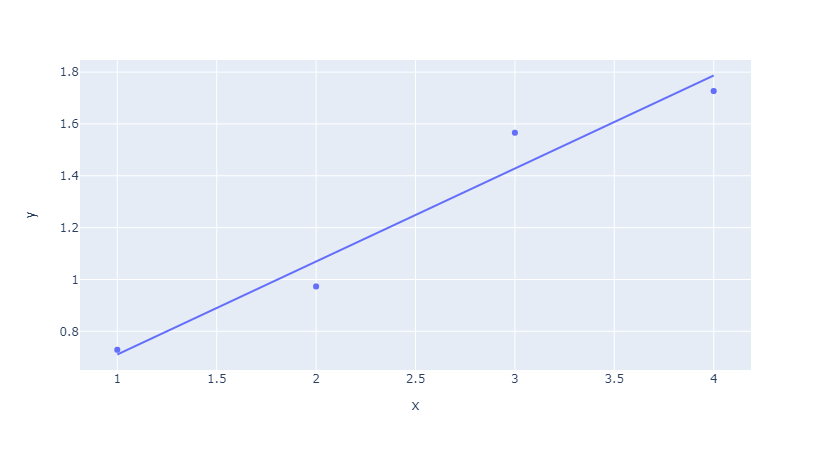

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



In [14]:
vs=[1000,2000,3000,4000]
files=['1kvn','2kv','3kv','4kv']
ks=[]
kks=[]
for i in range(len(vs)):
    ks.append(funcio(files[i],vs[i]))
    kks.append(ks[i][0])
print(ks)
xx=np.linspace(1,4,num=4)
fig=px.scatter(x=xx,y=kks,trendline='ols')
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
# print(results)

In [448]:

# PART 3
p3['X']=-p3['X']
p3['Y']=-p3['Y']
p3['X^2']=p3['X']**2
p3=p3.drop([0,1,2])

#PART 5
kv1['X']=-kv1['X']
kv1['Y']=-kv1['Y']
kv1['X^2']=kv1['X']**2
kv1.drop(kv1[kv1.X<0].index,inplace=True)

kv2['X']=-kv2['X']
kv2['Y']=-kv2['Y']
kv2['X^2']=kv2['X']**2
kv2.drop(kv2[kv2.X<0].index,inplace=True)

kv3['X']=-kv3['X']
kv3['Y']=-kv3['Y']
kv3['X^2']=kv3['X']**2
kv3.drop(kv3[kv3.X<0].index,inplace=True)

kv4['X']=-kv4['X']
kv4['Y']=-kv4['Y']
kv4['X^2']=kv4['X']**2
kv4.drop(kv4[kv4.X<0].index,inplace=True)
# df.drop(df[df.score < 50].index, inplace=True)

# p3['X^2'].iloc[:3]=-p3['X^2'].iloc[:3]


In [192]:
# fig1=px.scatter(p3,x='X',y='Y')
# fig1.show()
# coef=np.polynomial.polynomial.polyfit(p3.X,p3.Y,2)
# x1=np.linspace(p3.X[0],p3.X.iloc[[-1]],num=100)
# y1=np.polyval(coef,x1)
# # data=[x1,y1]
# df = pd.DataFrame(data, columns = ['x','y'])

# x1=x1.reshape(-1,1)
# y1=y1.reshape(-1,1)
# xx1
# data=pd.DataFrame({'ex':x1,'ey':y1},index=[1])
# fig2=px.scatter(x=x1,y=y1)
# fig=go.Figure(data=fig1.data + fig2.data)
# fig.show()

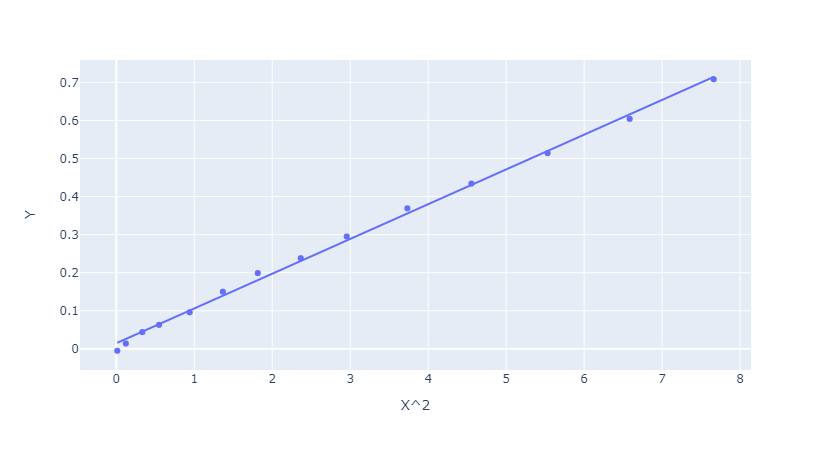

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5033.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           4.09e-17
Time:                        20:43:06   Log-Likelihood:                 43.537
No. Observations:                  14   AIC:                            -83.07
Df Residuals:                      12   BIC:                            -81.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0148      0.005      3.133      0.0

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=14



In [193]:
fig1=px.scatter(p3,x='X^2',y='Y',trendline="ols")
fig1.show()
results = px.get_trendline_results(fig1)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

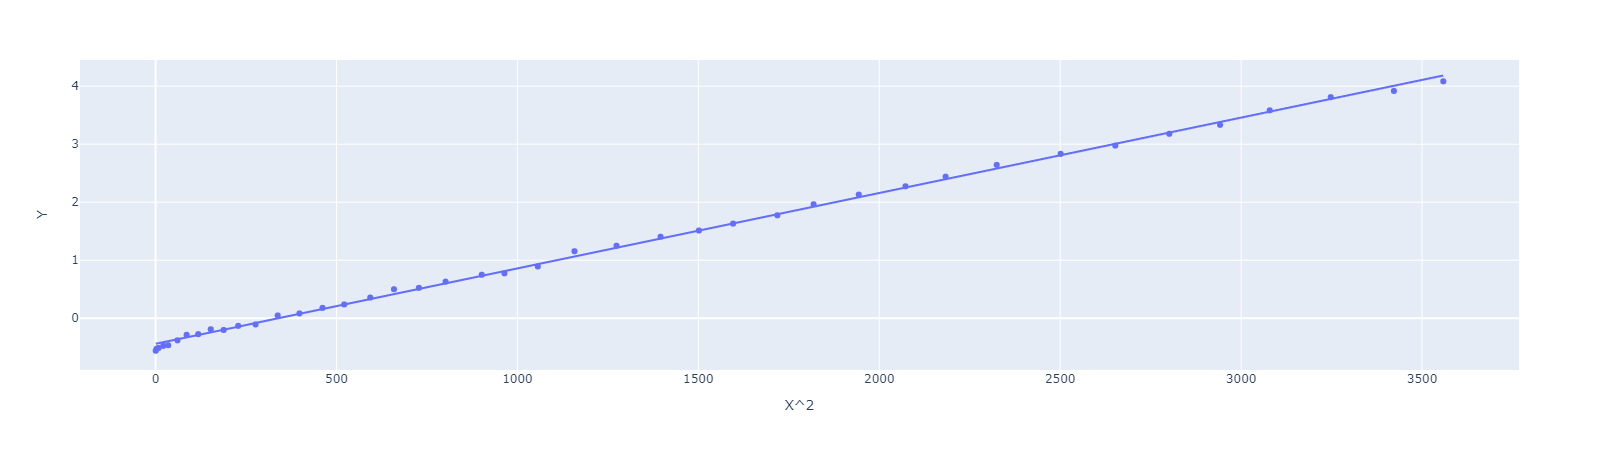

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.276e+04
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           6.65e-60
Time:                        20:43:07   Log-Likelihood:                 66.462
No. Observations:                  42   AIC:                            -128.9
Df Residuals:                      40   BIC:                            -125.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4414      0.012    -37.279      0.0

In [194]:
fig2=px.scatter(kv1,x='X^2',y='Y',trendline="ols")
fig2.show()
results = px.get_trendline_results(fig2)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

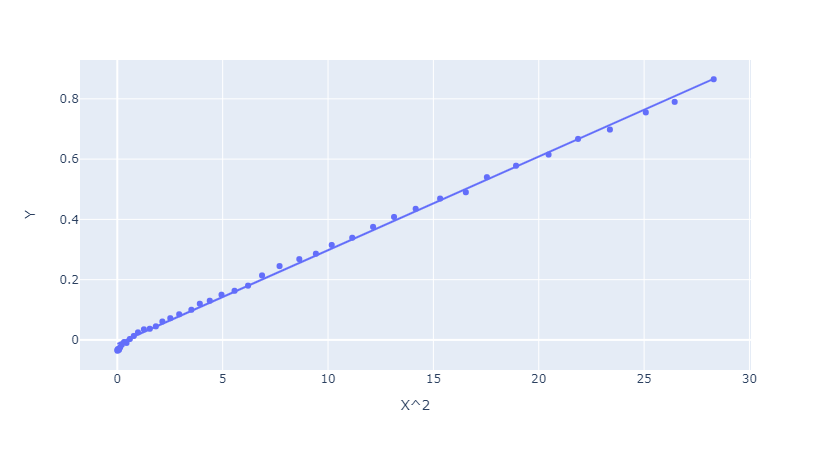

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.262e+04
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.08e-56
Time:                        20:43:33   Log-Likelihood:                 129.73
No. Observations:                  42   AIC:                            -255.5
Df Residuals:                      40   BIC:                            -252.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0129      0.002     -5.257      0.0

In [195]:
fig3=px.scatter(kv2,x='X^2',y='Y',trendline="ols")
fig3.show()
results = px.get_trendline_results(fig3)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

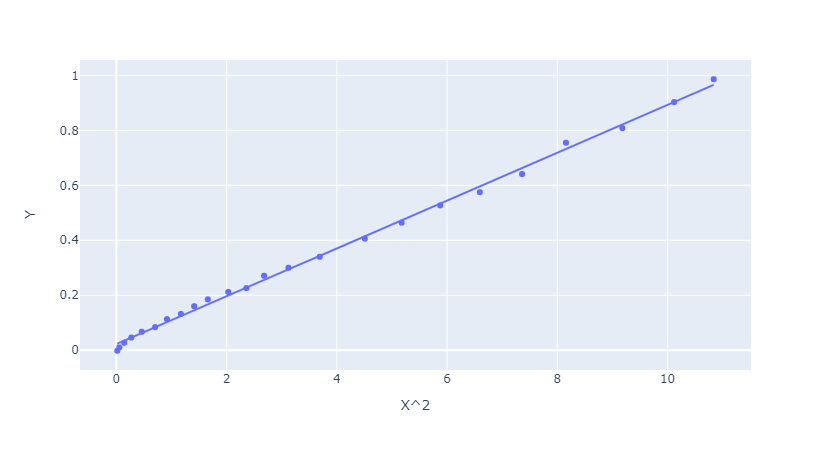

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.013e+04
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           8.37e-31
Time:                        20:43:43   Log-Likelihood:                 68.999
No. Observations:                  24   AIC:                            -134.0
Df Residuals:                      22   BIC:                            -131.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0221      0.004      5.129      0.0

In [196]:
fig4=px.scatter(kv3,x='X^2',y='Y',trendline="ols")
fig4.show()
results = px.get_trendline_results(fig4)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

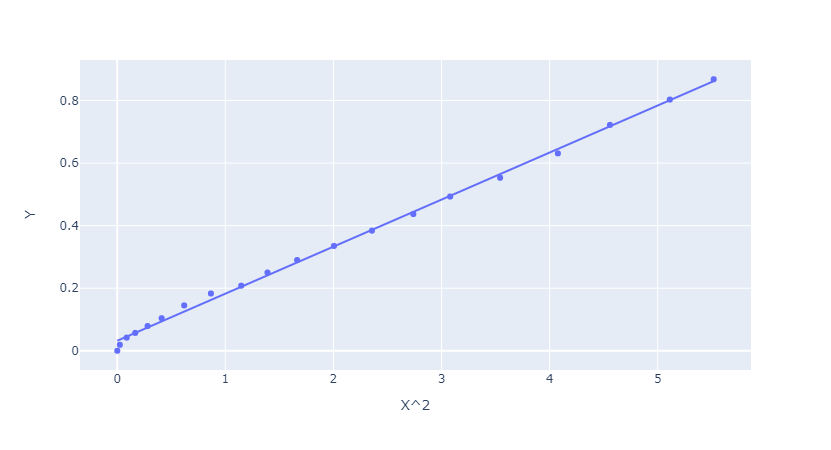

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8782.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.16e-25
Time:                        20:44:00   Log-Likelihood:                 60.106
No. Observations:                  20   AIC:                            -116.2
Df Residuals:                      18   BIC:                            -114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0320      0.004      7.523      0.0

In [199]:
fig5=px.scatter(kv4,x='X^2',y='Y',trendline="ols")
fig5.show()
results = px.get_trendline_results(fig5)
results = results.iloc[0]["px_fit_results"].summary()
print(results)